<a href="https://colab.research.google.com/github/nrozeboom/ai/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [3]:
print(tf.__version__)

1.12.0


In [0]:
# https://www.tensorflow.org/tutorials/keras/basic_classification
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# the labels only exist of numbers, therefore here below you see the classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

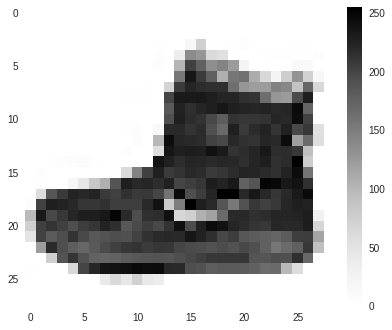

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

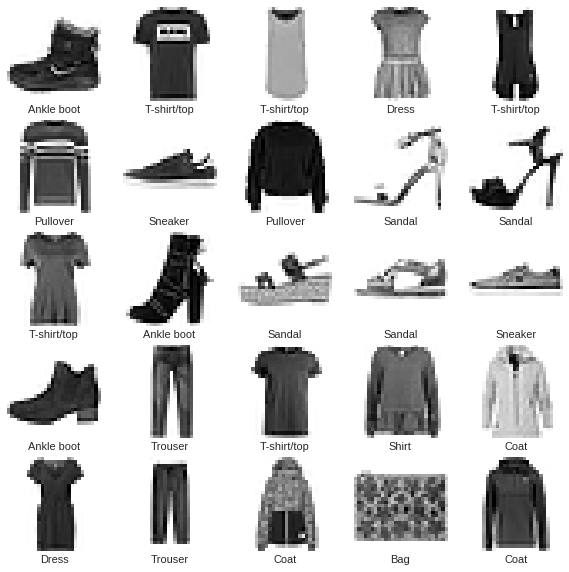

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.4910 - acc: 0.8275
Epoch 2/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.3732 - acc: 0.8652
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.3349 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.3105 - acc: 0.8868
Epoch 5/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2946 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2782 - acc: 0.8975
Epoch 7/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2673 - acc: 0.9015
Epoch 8/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2560 - acc: 0.9049
Epoch 9/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2463 - acc: 0.9081
Epoch 10/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2362 - acc: 0.9121

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 35us/step


In [17]:
print('Test accuracy:', test_acc)


Test accuracy: 0.8836


In [0]:
predictions = model.predict(test_images)


In [19]:
predictions[0]


array([1.6932713e-08, 6.5327669e-08, 1.2095189e-09, 2.7050617e-11,
       3.9846788e-09, 2.5577316e-04, 2.4948756e-09, 1.3600468e-02,
       1.1937433e-06, 9.8614246e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])


9

In [23]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


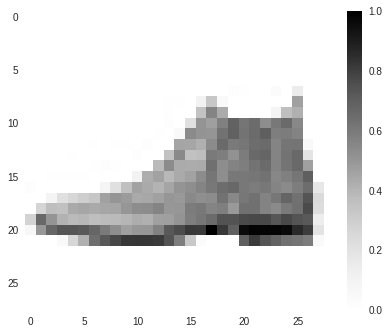

In [24]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

PREDICTIONS


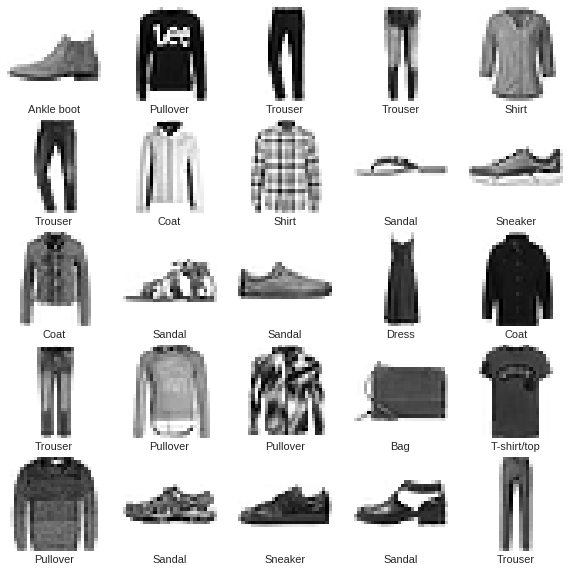

In [27]:
print("PREDICTIONS")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])

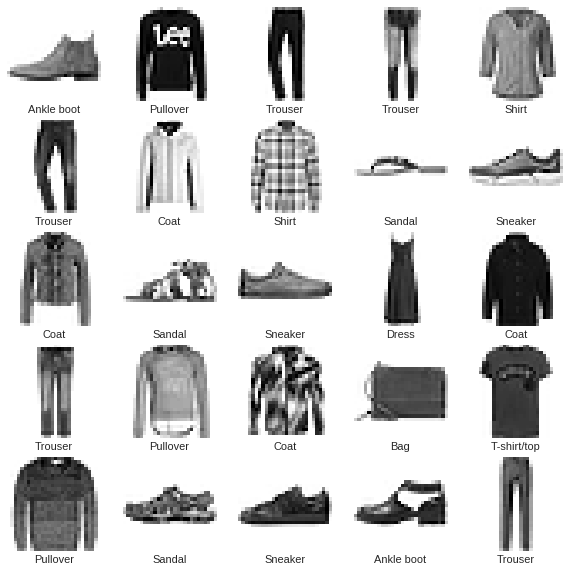

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])